In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

<Axes: >

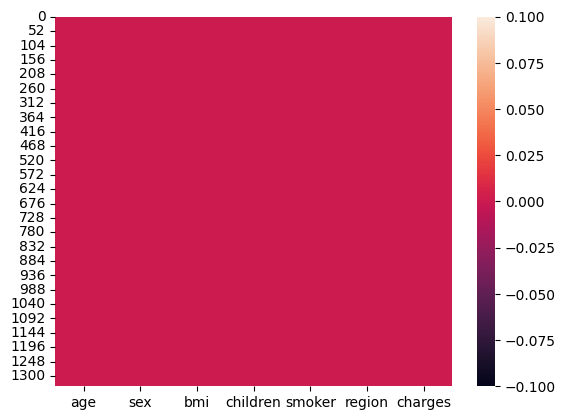

In [8]:
sns.heatmap(data.isnull())

No Null Values Present

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The continious columns seem to have normal distribution and are not highlt skewed

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
OE = OrdinalEncoder()
for i in data.columns:
  if data[i].dtypes == 'object':
    data[i] = OE.fit_transform(data[i].values.reshape(-1,1))

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


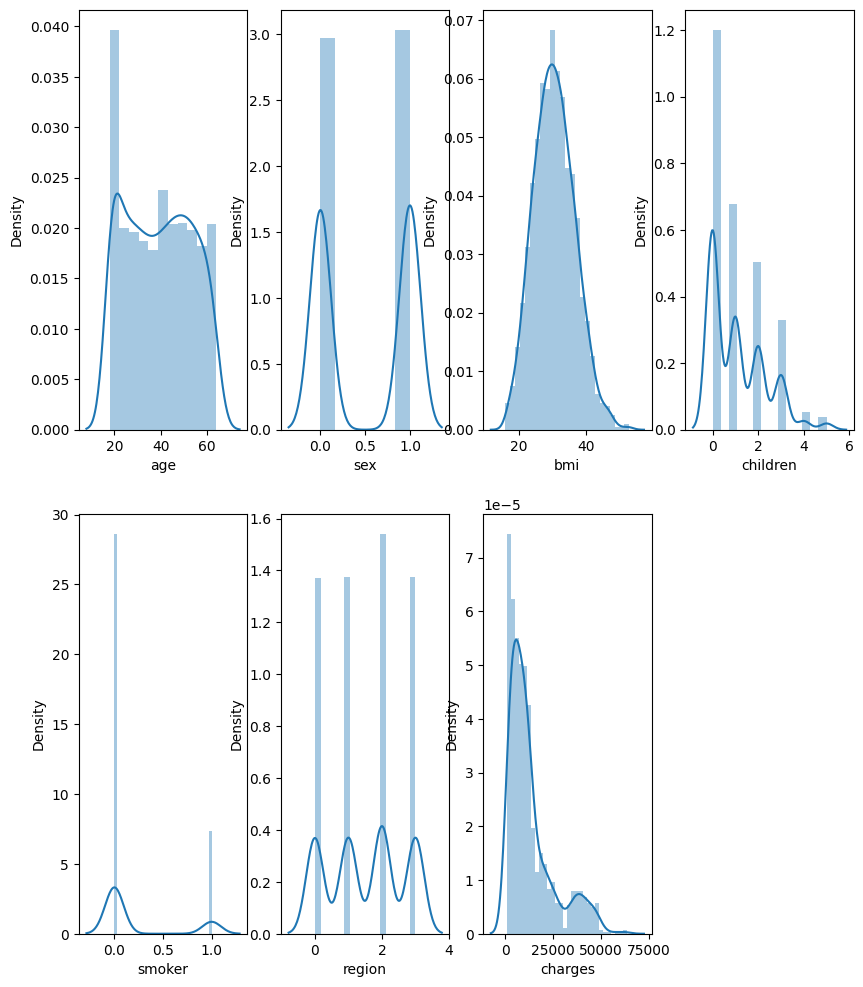

In [13]:
plt.figure(figsize = (10,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
        plotnumber +=1

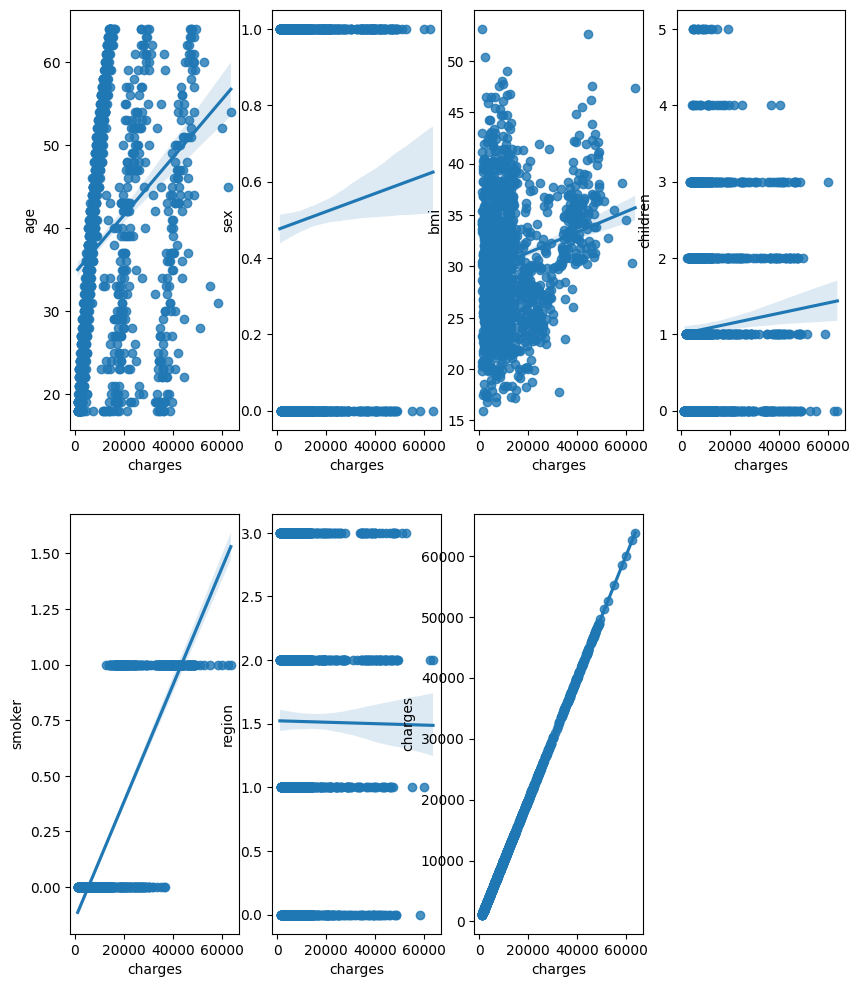

In [14]:
plt.figure(figsize = (10,12))
plotnumber = 1
for i in data:
    if plotnumber<=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.regplot(x = 'charges', y = i , data=data)
        plt.xlabel('charges')
        plt.ylabel(i)
        plotnumber +=1

distribtution is normal is almost all continious features and outliers are minimal so we don't need to work on skewness at this point


The strongest relationship with target belongs to smoking and then age and lastly bmi but none of the other features have a very strong relationship with target

<Axes: >

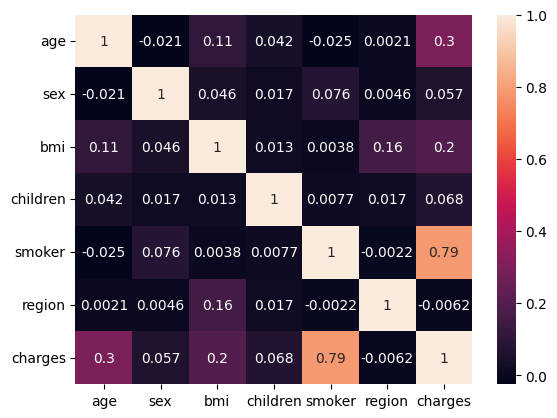

In [15]:
sns.heatmap(data.corr(), annot = True)

It doesn't seem we have a multicolinearity issue here

Also it seems Region has almost no relationship with the target so we can remove it from the features

In [16]:
data.drop(['region'], axis = 1 , inplace = True)

In [17]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0.0,27.900,0,1.0,16884.92400
1,18,1.0,33.770,1,0.0,1725.55230
2,28,1.0,33.000,3,0.0,4449.46200
3,33,1.0,22.705,0,0.0,21984.47061
4,32,1.0,28.880,0,0.0,3866.85520


In [18]:
x = data.drop('charges', axis=1)
y = data['charges']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN

In [22]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.804139437709597 
 Best Random State: 112


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**


In [24]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.804139437709597
R2_score for training data: 0.7238742852848499
MAE: 3938.965315813361
MSE: 29883449.604033142
RMSE: 62.76117681985704


**Random Forest**

In [25]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.8922568578465884
R2_score for training data: 0.7238742852848499
MAE: 2294.149168246517
MSE: 16438923.288434872
RMSE: 47.8972772529558


**KNN**


In [26]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.8583071673270151
R2_score for training data: 0.8549929110045046
MAE: 2833.0437657089547
MSE: 21618801.533703763
RMSE: 53.226344658533094


**Gradient Boosting**

In [27]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.9039494329459903
R2_score for training data: 0.8926007929471903
MAE: 2286.4204359915516
MSE: 14654927.191220203
RMSE: 47.81652889944597


**LASSO**

In [28]:
lasso = Lasso()
lasso.fit(x_train,y_train)
lassopred = lasso.predict(x_test)
lasso_trainpred = lasso.predict(x_train)
print('R2_score:', r2_score(y_test,lassopred))
print('R2_score for training data:', r2_score(y_train,lasso_trainpred))
print('MAE:', mean_absolute_error(y_test, lassopred))
print('MSE:', mean_squared_error(y_test, lassopred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, lassopred)))

R2_score: 0.8041423223839226
R2_score for training data: 0.7238742488695402
MAE: 3938.847109135674
MSE: 29883009.47448983
RMSE: 62.760235094649495


**Ridge**

In [29]:
ridge = Ridge()
ridge.fit(x_train,y_train)
ridgepred = ridge.predict(x_test)
ridge_trainpred = ridge.predict(x_train)
print('R2_score:', r2_score(y_test,ridgepred))
print('R2_score for training data:', r2_score(y_train,ridge_trainpred))
print('MAE:', mean_absolute_error(y_test, ridgepred))
print('MSE:', mean_squared_error(y_test, ridgepred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, ridgepred)))

R2_score: 0.8041262967274325
R2_score for training data: 0.7238733762555487
MAE: 3941.004117076518
MSE: 29885454.59101809
RMSE: 62.77741725394983


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
score = cross_val_score(LR, x_scaled, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.76097874 0.70873346 0.7755842  0.73136684 0.7565446 ]
0.746641566347216
Difference Between score mean and R2score: 0.05749787136238094


In [32]:
score1 = cross_val_score(RFR, x_scaled, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.84517176 0.77188301 0.85805025 0.817941   0.83864307]
0.8263378181992114
Difference Between score mean and R2score: 0.065919039647377


In [33]:
score2 = cross_val_score(knn, x_scaled, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.84778374 0.75037495 0.85296845 0.79761474 0.80444097]
0.8106365711269623
Difference Between score mean and R2score: 0.04767059620005276


In [34]:
score3 = cross_val_score(GBR, x_scaled, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.87460678 0.79984301 0.89076497 0.84641083 0.85840924]
0.8540069679660384
Difference Between score mean and R2score: 0.04994246497995192


In [35]:
score4 = cross_val_score(lasso, x_scaled, y)
print(score4)
print(score4.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,lassopred)-score4.mean())

[0.76098416 0.70876047 0.77557188 0.73137115 0.75654298]
0.7466461299632466
Difference Between score mean and R2score: 0.05749619242067594


In [36]:
score5 = cross_val_score(ridge, x_scaled, y)
print(score5)
print(score5.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,ridgepred)-score5.mean())

[0.76099004 0.70883492 0.77546833 0.73142311 0.75651375]
0.7466460287372374
Difference Between score mean and R2score: 0.05748026799019512


Text(0.5, 1.0, 'Gradient Boosting')

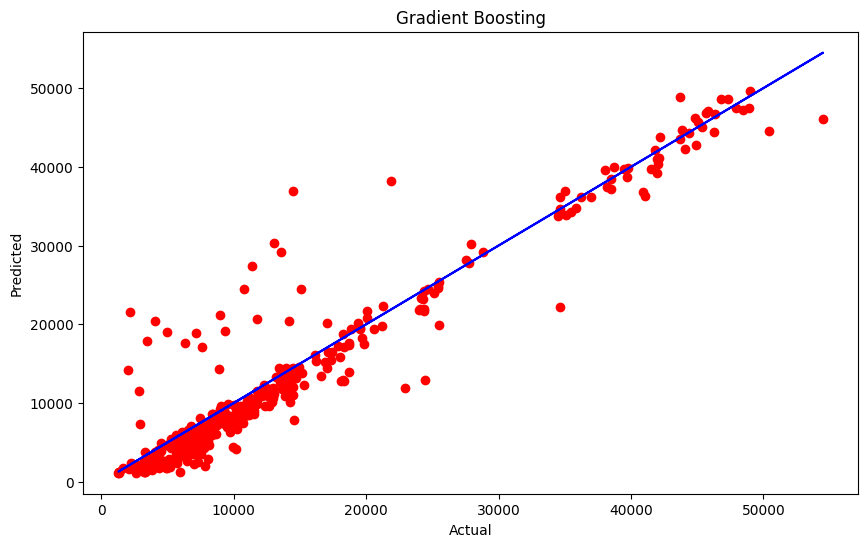

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(x=GBRpred,y=y_test,color='r')
plt.plot(GBRpred,GBRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

Text(0.5, 1.0, 'Random Forest')

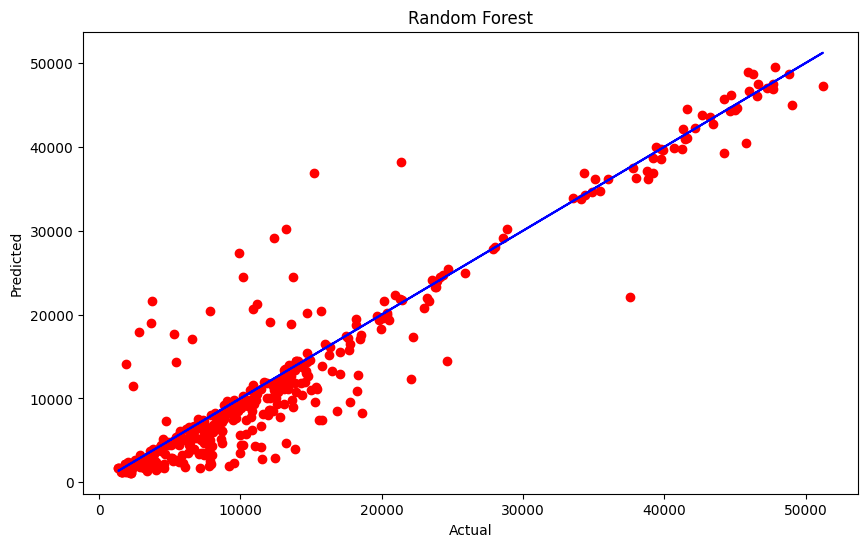

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=RFRpred,y=y_test,color='r')
plt.plot(RFRpred,RFRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

Given the scores and plots Gradient Boosting and Random Forest both seem to be good models, but Gradient Boosting is slightly better

In [43]:
from sklearn.model_selection import GridSearchCV

In [51]:
param = {'criterion': ['friedman_mse', 'squared_error'], 'n_estimators':[50,100,200,300,500], 'max_depth': [1, 3, 10, 30, 100, 300], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]}
gscv = GridSearchCV(GBR,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [1, 3, 10, 30, 100, 300],
                         'max_leaf_nodes': [2, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 200, 300, 500]})

In [52]:
gscv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'n_estimators': 50}

In [54]:
model = GradientBoostingRegressor(criterion ='squared_error',learning_rate = 0.1, max_depth= 3, max_leaf_nodes= 5, n_estimators = 50)

In [55]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.9166986224188588
MAE: 2239.88719462665
MSE: 12709718.024814148
RMSE: 47.32744652552734


In [56]:
import joblib

In [57]:
joblib.dump(model,'Insurance_cost_model.pk1')

['Insurance_cost_model.pk1']

In [58]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [59]:
df

,Actual,Prediction
0,11090.71780,12136.363228
1,8017.06115,8499.261561
2,34617.84065,34419.973939
3,24535.69855,24107.645783
4,23967.38305,23744.861165
...,...,...
397,5972.37800,7750.836013
398,5245.22690,7176.497021
399,6948.70080,9040.362677
400,2680.94930,3302.880478
